# INTRODUCTION
Le projet porte sur les données "French trains", collectées par la SNCF, la compagnie française de chemins de fer. Le jeux de données ("dataset") comprends des informations sur différents aspects de la performance des trains comme le temps de trajet moyen, le nombre de trains annulés et le nombre de trains. De plus, il contient aussi les causes de ces délais; facteurs externes, l'infrastructure ferroviaire et le matériel roulant.

La problématique est de comprendre les facteurs qui impactent la performance des trains français et identifier les potentiels domaines à améliorer.
Certaines questions de recherche peuvent donc se poser à ce stade pour cet ensemble de données:
* Quel est le temps de parcours moyen des trains français, et comment varie-t-il selon les mois ?
* Quelles sont les causes les plus fréquentes d'annulations et de retards de train en France ?
* Comment le nombre de trains en retard et le retard moyen au départ varient-ils dans le temps ?

Se poser ces questions et y répondre est important car l'amélioration des performances du réseau ferroviaire français peut avoir un impact positif sur l'économie du pays et l'expérience de voyage des voyageurs. En identifiant les facteurs qui contribuent à la mauvaise performance, la SNCF et les autres parties prenantes peuvent prendre des mesures pour améliorer la fiabilité et la ponctualité des trains.




[texte du lien](https://)# PACKAGES REQUIRED FOR ANALYSIS

**Pandas**
est une bibliothèque pour la manipulation et l'analyse de données sur Python.

**Numpy**
est une bibliothèque permettant de travailler avec des tableaux et des opérations mathématiques sur Python.

**Matplotlib**
est une bibliothèque pour la visualisation des données.

**Seaborn**
est une bibliothèque permettant de créer des graphiques plus attrayants et complexes que Matplotlib.

**Sklearn** (abréviation de Scikit-Learn) est une bibliothèque pour l'apprentissage automatique ("Machine Learning") en Python.

**LabelEncoder** est une classe de la bibliothèque sklearn pour encoder des données catégorielles sous forme de données numériques. Cela est souvent nécessaire lorsque on travaille avec des algorithmes de "machine learning", qui nécessitent généralement des données numériques.

**StandardScaler** est une classe de la bibliothèque sklearn pour la mise à l'échelle des données afin d'avoir une moyenne de 0 et un écart type de 1. Ceci est souvent nécessaire pour les algorithmes d'apprentissage automatique, qui peuvent être sensibles à l'échelle des données.

**LogisticRegression** est une classe de la bibliothèque sklearn. La régression logistique est un algorithme de classification qui prédit un résultat binaire (par exemple 0 ou 1) basé sur une combinaison linéaire de caractéristiques d'entrée.

**KMeans** est une classe de la bibliothèque sklearn pour ajuster les modèles de clustering k-means. Le clustering K-means est un algorithme d'apprentissage non supervisé ("unsupervised") qui regroupe des points de données similaires en clusters.

**RandomForestRegressor** est une classe de la bibliothèque sklearn.ensemble pour ajuster des modèles de "random forest regression". "Random forest " est un algorithme d'apprentissage d'ensemble qui utilise plusieurs arbres de décision pour faire des prédictions.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

# DATA CLEANING AND PREPARATION

La première étape dans l'analyse des données sur les trains français est de préparer et nettoyer le "dataset". Celle-ci comprend un nombres de taches comme supprimer les colonnes inutiles, enlever des données incomplètes ou non pertinentes et completer les valeurs manquantes.

Pour commencer, 3 colonnes ont étés supprimés du jeux de données :**comment_cancellations**, **comment_delays_at_departure** et **comment_delays_on_arrival**. Ces colonnes contennaient seulement des valeurs NAN et aucune donnée numérique qui aurait pu etre utilisé pour une analyse.

Ensuite, les lignes contenant des valeurs vides dans la colonne service ont été supprimées de l'ensemble de données. En effet, la colonne service est une caractéristique importante pour distinguer les différents types de trains, et les valeurs manquantes dans cette colonne ne pouvaient pas être complétées avec précision.

De plus, toutes les lignes appartenant à l'année 2018 ont été supprimées de l'ensemble de données. En effet, l'ensemble de données ne précisait pas si ces trains étaient nationaux ou internationaux, et cette information est nécessaire pour interpréter précisément les données.

Enfin, les valeurs manquantes dans les colonnes restantes ont été remplies à l'aide de la méthode fillna(). Cette méthode a été utilisée pour remplacer les valeurs manquantes par la moyenne interquartile de la colonne correspondante. Cela permet de s'assurer que les données sont complètes et cohérentes et qu'elles peuvent être utilisées pour des analyses ultérieures.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-02-26/full_trains.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             5462 non-null   int64  
 1   month                            5462 non-null   int64  
 2   service                          4032 non-null   object 
 3   departure_station                5462 non-null   object 
 4   arrival_station                  5462 non-null   object 
 5   journey_time_avg                 5462 non-null   float64
 6   total_num_trips                  5462 non-null   int64  
 7   num_of_canceled_trains           5462 non-null   int64  
 8   comment_cancellations            0 non-null      float64
 9   num_late_at_departure            5462 non-null   int64  
 10  avg_delay_late_at_departure      5462 non-null   float64
 11  avg_delay_all_departing          5462 non-null   float64
 12  comment_delays_at_de

In [ ]:
df.describe()

,year,month,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,avg_delay_late_at_departure,avg_delay_all_departing,comment_delays_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
count,5462.000000,5462.000000,5462.000000,5462.000000,5462.000000,0.0,5462.000000,5462.000000,5462.000000,0.0,...,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5457.000000,5457.000000,5457.000000,5457.000000
mean,2016.523618,6.369096,165.391150,281.069205,7.737276,NaN,41.577627,16.808900,2.539087,NaN,...,0.277982,0.251820,0.183131,0.178773,0.069994,0.037302,26.090892,28.983826,11.648342,4.197178
std,1.124908,3.386042,78.939880,155.086779,23.653971,NaN,50.990911,8.802567,3.971868,NaN,...,0.158786,0.147247,0.144341,0.127381,0.077427,0.052049,21.478016,18.873250,10.407551,4.681769
min,2015.000000,1.000000,45.956731,6.000000,0.000000,NaN,0.000000,0.000000,-4.467890,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000
25%,2016.000000,3.000000,100.770594,181.000000,0.000000,NaN,10.000000,11.975578,0.896013,NaN,...,0.166667,0.151515,0.080000,0.092916,0.000000,0.000000,11.000000,8.993720,4.000000,1.000000
50%,2017.000000,6.000000,160.843797,238.000000,1.000000,NaN,23.000000,15.837025,1.782895,NaN,...,0.257143,0.235294,0.161290,0.158435,0.052632,0.021277,20.000000,31.533333,9.000000,3.000000
75%,2018.000000,9.000000,205.699495,390.000000,4.000000,NaN,51.750000,20.284598,3.242813,NaN,...,0.368421,0.333333,0.257143,0.240000,0.102564,0.057692,35.000000,41.000000,16.000000,6.000000
max,2018.000000,12.000000,481.000000,878.000000,279.000000,NaN,451.000000,173.571429,173.571429,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,192.000000,258.000000,91.000000,36.000000


In [ ]:
df.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0


In [ ]:
df.tail()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
5457,2018,9,NaN,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.0,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,NaN,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.0,0.040000,25.0,7.000936,10.0,1.0
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,NaN,24,...,0.050000,0.400000,0.300000,0.250000,0.0,0.000000,10.0,4.351136,5.0,1.0
5460,2018,9,NaN,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,NaN,15,...,0.000000,0.250000,0.250000,0.500000,0.0,0.000000,4.0,2.421278,0.0,0.0
5461,2018,9,NaN,ST MALO,PARIS MONTPARNASSE,173.555556,90,0,NaN,4,...,0.000000,0.000000,0.250000,0.250000,0.5,0.000000,1.0,2.931111,0.0,0.0


In [ ]:
df.drop(columns = 'comment_cancellations', inplace =True)
df.drop(columns = 'comment_delays_at_departure', inplace =True)
df.drop(columns = 'comment_delays_on_arrival', inplace =True)
df.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,15,11.550000,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,10,14.653333,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,20,13.694167,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,36,20.988426,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,16,20.963542,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0


In [ ]:
year_value = df.groupby('year')['service'].nunique()
year_value
#Pour l'ensemble des données en 2018, il n'y a aucune valeur

year
2015    2
2016    2
2017    2
2018    0
Name: service, dtype: int64

In [ ]:
df.dropna(subset = ['service'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4032 entries, 0 to 5250
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             4032 non-null   int64  
 1   month                            4032 non-null   int64  
 2   service                          4032 non-null   object 
 3   departure_station                4032 non-null   object 
 4   arrival_station                  4032 non-null   object 
 5   journey_time_avg                 4032 non-null   float64
 6   total_num_trips                  4032 non-null   int64  
 7   num_of_canceled_trains           4032 non-null   int64  
 8   num_late_at_departure            4032 non-null   int64  
 9   avg_delay_late_at_departure      4032 non-null   float64
 10  avg_delay_all_departing          4032 non-null   float64
 11  num_arriving_late                4028 non-null   float64
 12  avg_delay_late_on_ar

In [ ]:

def quartile_avg(x) :
  q1, q2, q3 = df[x].quantile([0.25, 0.5, 0.75])
  mean_quartiles = np.mean([q1, q2, q3])
  return mean_quartiles
#liste des colonnes avec des valeurs manquantes
list_to_find_avg = ["delay_cause_external_cause",
                    "delay_cause_rail_infrastructure",
                    "delay_cause_traffic_management",
                    "delay_cause_rolling_stock",
                    "delay_cause_station_management",
                    "delay_cause_travelers",
                    "num_arriving_late",
                    "avg_delay_late_on_arrival",
                    "num_greater_15_min_late",
                    "avg_delay_late_greater_15_min",
                    "num_greater_30_min_late",
                    "num_greater_60_min_late"]

all_avg = []
for i in list_to_find_avg:
  all_avg.append(quartile_avg(i))
#Remplissage des valeurs NaN par la moyenne interquartile
for i in range(len(list_to_find_avg)):
  df = df.fillna({list_to_find_avg[i]:all_avg[i]})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4032 entries, 0 to 5250
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             4032 non-null   int64  
 1   month                            4032 non-null   int64  
 2   service                          4032 non-null   object 
 3   departure_station                4032 non-null   object 
 4   arrival_station                  4032 non-null   object 
 5   journey_time_avg                 4032 non-null   float64
 6   total_num_trips                  4032 non-null   int64  
 7   num_of_canceled_trains           4032 non-null   int64  
 8   num_late_at_departure            4032 non-null   int64  
 9   avg_delay_late_at_departure      4032 non-null   float64
 10  avg_delay_all_departing          4032 non-null   float64
 11  num_arriving_late                4032 non-null   float64
 12  avg_delay_late_on_ar

In [ ]:
df.describe()

,year,month,journey_time_avg,total_num_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,avg_delay_all_departing,num_arriving_late,avg_delay_late_on_arrival,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
count,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,...,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000
mean,2016.000000,6.500000,163.860313,286.167907,2.721726,30.781498,18.385093,2.371759,35.778770,32.220984,...,0.284938,0.257186,0.175483,0.165389,0.075042,0.038558,24.569114,36.729340,10.821677,3.940807
std,0.816598,3.452481,76.898141,151.332162,8.361377,34.027535,8.466475,4.366460,28.607562,13.552361,...,0.156064,0.150248,0.142986,0.119775,0.081123,0.052226,20.385082,15.702281,9.580416,4.487496
min,2015.000000,1.000000,46.186047,8.000000,0.000000,0.000000,0.000000,-4.467890,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000
25%,2015.000000,3.750000,100.489455,186.000000,0.000000,8.000000,13.713410,0.844547,16.000000,23.769142,...,0.177778,0.153846,0.071429,0.084686,0.000000,0.000000,10.000000,29.553030,4.000000,1.000000
50%,2016.000000,6.500000,160.901236,239.000000,0.000000,19.000000,17.088788,1.586452,27.000000,30.408333,...,0.272469,0.247397,0.153846,0.150000,0.056085,0.024390,19.000000,36.124741,8.000000,2.000000
75%,2017.000000,9.250000,203.407648,405.250000,2.000000,40.000000,21.267081,2.896923,47.000000,38.277462,...,0.375000,0.342293,0.250000,0.222222,0.111111,0.060000,32.000000,44.095986,15.000000,5.000000
max,2017.000000,12.000000,453.846154,876.000000,107.000000,248.000000,173.571429,173.571429,220.000000,258.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,159.000000,258.000000,72.000000,34.000000


# EXPLORATY DATA ANALYSIS

In [ ]:
#moyenne de la durée des voyages
mean =df['journey_time_avg'].mean()
median =df['journey_time_avg'].median()
print("moyenne :" +str(mean), "médiane :" + str(median))
df['journey_time_avg'].std()


moyenne :163.86031313623215 médiane :160.90123626399998


76.89814059442222

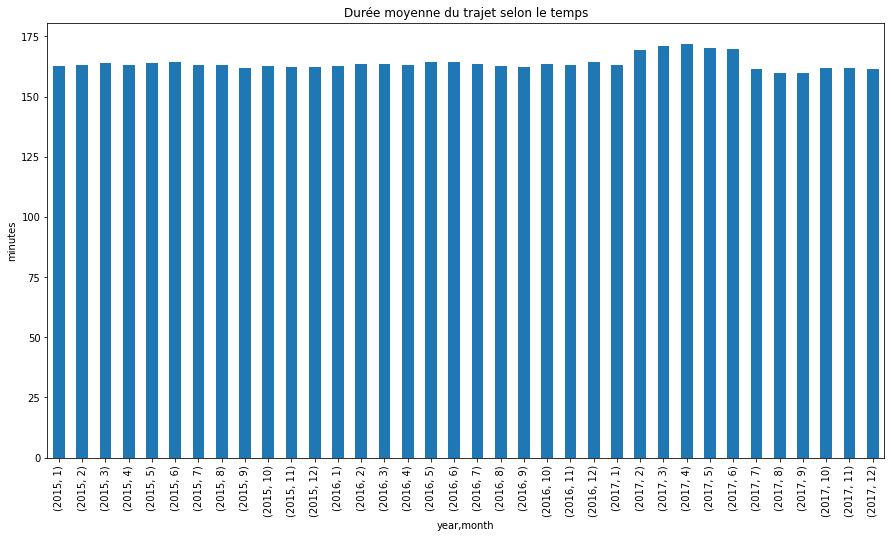

In [ ]:
tab = df.groupby(['year', 'month'])['journey_time_avg'].mean()
tab
plt.figure(figsize=(15,8))
tab.plot(ylabel = 'minutes',
         kind = 'bar',
         title ='Durée moyenne du trajet selon le temps')


On remarque que l'année 2017 est l'année avec les plus longs trajets. C'est une information utile car l'augmentation du temps de trajet impact le cout de production lié à l'essence utilisé pour faire rouler le train ainsi que le salaire horaire du personnel du train (conducteur, controleur). Ce cout doit etre assumé par la compagnie et etre minimisé.

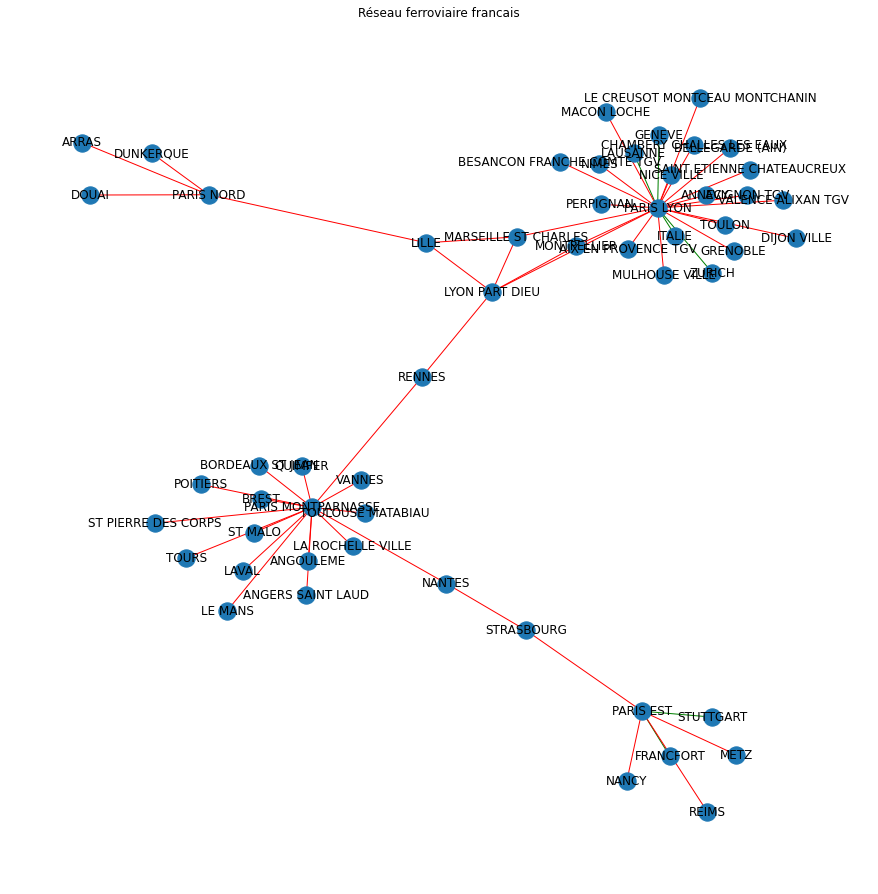

In [ ]:
#Pour pouvoir une idée du réseau ferroviaire, la théorie des graphes est une application pertinente (learning new skills)

import networkx as nx

#Pour ce faire, je groupe les stations de départ et d'arrivée afin d'avoir les différentes liaisons existants
grouped = df.groupby(['departure_station', 'arrival_station', 'service'])
#application d'aggregation sur les données groupées
grouped_mean = grouped.mean()
#Création du graphique
G = nx.Graph()

edge_colors = {'International': 'green', 'National': 'red'}

for name, group in grouped_mean.iterrows(): #itération sur les lignes des données groupées
  departure = name[0]
  arrival = name [1]
  service = name [2]
#ajout des arretes au graphe
  G.add_edge(departure, arrival, weight=group['journey_time_avg'], color= edge_colors[service])

#création de la figure
plt.figure(figsize=(12,12))
labels = {node: node for node in G.nodes()}
#Dessin du graphe
nx.draw(G,labels=labels, edge_color=[G[u][v]['color'] for u, v in G.edges()])

#création d'une liste de couleurs pour la légende
legend_colors = ['green', 'red']

# ajout d'un titre au graphe
plt.title('Réseau ferroviaire francais')

plt.show()

Dans le cadre de l'analyse exploratoire des données, un graphique du réseau a été créé afin de visualiser les itinéraires des trains dans l'ensemble des données. Ce graphique a ressorti un certain nombre d'informations intéressantes sur le réseau ferroviaire français.

Tout d'abord, le graphique a montré que les trains français ont six destinations internationales : l'Italie, Francfort (Allemagne), Stuttgart (Allemagne), Lausanne, Zurich et Genève (Suisse). Cela signifie que le réseau ferroviaire français est relié à d'autres pays d'Europe, ce qui offre aux passagers un éventail d'options de voyage.

Deuxièmement, sur le graphique du réseau ont peu identifier les deux gares centrales du réseau ferroviaire français : Paris Lyon et Paris Montparnasse. Ces gares semblent être les plaques tournantes du réseau, de nombreux trains ayant leur origine ou leur destination à ces endroits.


In [ ]:
route_trips = df.groupby(['departure_station', 'arrival_station'])['total_num_trips'].sum()
route_trips

departure_station    arrival_station   
AIX EN PROVENCE TGV  PARIS LYON            15026
ANGERS SAINT LAUD    PARIS MONTPARNASSE    16076
ANGOULEME            PARIS MONTPARNASSE    11775
ANNECY               PARIS LYON             6488
ARRAS                PARIS NORD            11526
                                           ...  
TOULOUSE MATABIAU    PARIS MONTPARNASSE     6230
TOURS                PARIS MONTPARNASSE     6904
VALENCE ALIXAN TGV   PARIS LYON             9429
VANNES               PARIS MONTPARNASSE     8461
ZURICH               PARIS LYON             5500
Name: total_num_trips, Length: 112, dtype: int64

In [ ]:
busiest_routes = route_trips.sort_values(ascending =False)
top_10_busiest_routes = busiest_routes[:10]
top_10_busiest_routes

departure_station   arrival_station     
BORDEAUX ST JEAN    PARIS MONTPARNASSE      24787
PARIS MONTPARNASSE  BORDEAUX ST JEAN        23441
LYON PART DIEU      PARIS LYON              21851
PARIS LYON          LYON PART DIEU          21244
PARIS NORD          LILLE                   20508
RENNES              PARIS MONTPARNASSE      20365
LILLE               PARIS NORD              20177
AVIGNON TGV         PARIS LYON              19835
LYON PART DIEU      MARSEILLE ST CHARLES    19731
NANTES              PARIS MONTPARNASSE      19640
Name: total_num_trips, dtype: int64

Les dix itinéraires les plus fréquentés sont :
1)Bordeaux St Jean à Paris Montparnasse
2)Paris Montparnasse à Bordeaux St Jean
3) Lyon Part Dieu - Paris Lyon
4) Paris Lyon vers Lyon Part Dieu
5)Paris Nord à Lille
6) Rennes - Paris Montparnasse
7) Lille - Paris Nord
8) Avignon TGV à Paris Lyon
9) Lyon Part Dieu - Marseille St Charles
10) Nantes à Paris Montparnasse
Ces résultats suggèrent que les lignes les plus fréquentées du réseau ferroviaire français sont celles qui relient les grandes villes, telles que Paris, Lyon et Bordeaux. De plus, les résultats montrent que de nombreux trains circulent entre Paris et d'autres villes, ce qui indique l'importance de la capitale en tant que élément central du réseau ferroviaire.

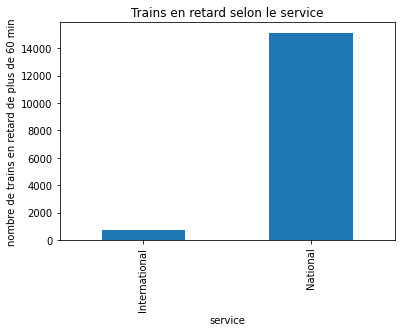

In [ ]:
trains_late_by_service = df.groupby("service")["num_greater_60_min_late"].sum().sort_values(ascending= True)
trains_late_by_service.plot(kind = 'bar',
                            xlabel = 'service',
                            ylabel = 'nombre de trains en retard de plus de 60 min',
                            title = 'Trains en retard selon le service')

Sur la base de l'analyse visuelle des données, il apparaît que le nombre de trains ayant un retard de plus de 60 minutes dans le service national est bien supérieur que dans le service international. Cela suggère que les trains de la catégorie de service national étaient plus susceptibles de subir des retards plus longs que les autres services. La cause exacte de ces retards n'est pas claire d'après les informations fournies, mais les causes potentielles pourraient inclure des facteurs tels que l'état du matériel roulant, la gestion des gares ou le comportement des voyageurs.

In [ ]:
train_late_by_year = df.groupby('year')["num_greater_60_min_late"].sum().sort_values(ascending=True)
train_late_by_year

year
2016    4841.000000
2015    5079.333333
2017    5969.000000
Name: num_greater_60_min_late, dtype: float64

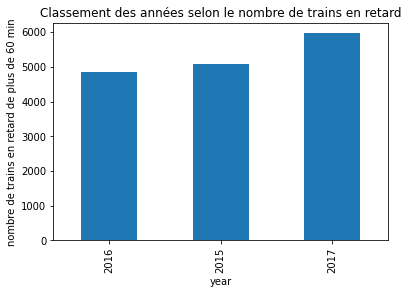

In [ ]:
train_late_by_year.plot(kind ='bar',
                        xlabel = 'year',
                        ylabel ='nombre de trains en retard de plus de 60 min',
                        title = "Classement des années selon le nombre de trains en retard")

On remarque ici une petite tendance à l'augmentation du retard au fil des années

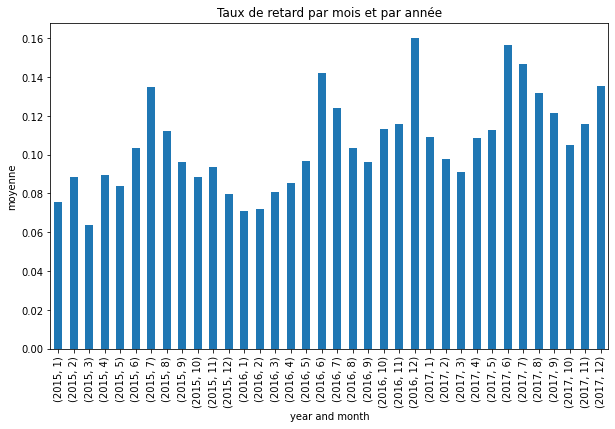

In [ ]:
df["delay_rate"] = df["num_late_at_departure"] / df["total_num_trips"]

# Regroupement des données par année et par mois
grouped = df.groupby(["year", "month"])

# Calcul de la moyenne du taux de retard pour chaque mois de chaque année
mean_delay_rate = grouped["delay_rate"].mean()
# Création d'un graphique en barres pour visualiser les résultats

plt.figure(figsize=(10,6))
mean_delay_rate.plot(kind='bar',
                     xlabel ='year and month',
                     ylabel = 'moyenne',
                     title ='Taux de retard par mois et par année')

Le graphique du taux de retard par mois et par année révèle plusieurs pics. En particulier, le taux de retard semble avoir augmenté de manière significative en juillet 2015, en juin et décembre 2016 ainsi qu'en juin 2017. Des facteurs spécifiques sont entrés en jeu au cours de ces mois et ont conduit à une augmentation du nombre de trains subissant des retards.

Text(0.5, 1.0, "Taux de retard vs. Taux d'annulation")

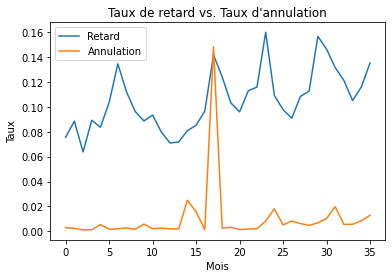

In [ ]:
df["delay_rate"] = df["num_late_at_departure"] / df["total_num_trips"]
df["cancellation_rate"] = df["num_of_canceled_trains"] / df["total_num_trips"]

# Regroupement des données par année et par mois
grouped = df.groupby(["year", "month"])

# Calcul du taux de retard moyen et le taux d'annulation pour chaque année et chaque mois.
mean_delay_rate = grouped["delay_rate"].mean()
mean_cancellation_rate = grouped["cancellation_rate"].mean()
# Conversion des données
mean_delay_rate_arr = mean_delay_rate.to_numpy()
mean_cancellation_rate_arr = mean_cancellation_rate.to_numpy()
# Visualisation
plt.plot(mean_delay_rate_arr, label ='Retard')
plt.plot(mean_cancellation_rate_arr, label = 'Annulation')
plt.legend()
plt.xlabel("Mois")
plt.ylabel("Taux")
plt.title("Taux de retard vs. Taux d'annulation")

Au cours du mois de juin 2016, le taux d'annulation et le taux de retard ont tous deux augmenté de manière significative. Cela indique qu'il y avait probablement des facteurs communs en jeu au cours de ce mois qui ont contribué à une augmentation du nombre de trains annulés et du nombre de trains subissant des retards (une grève, une crise,..)

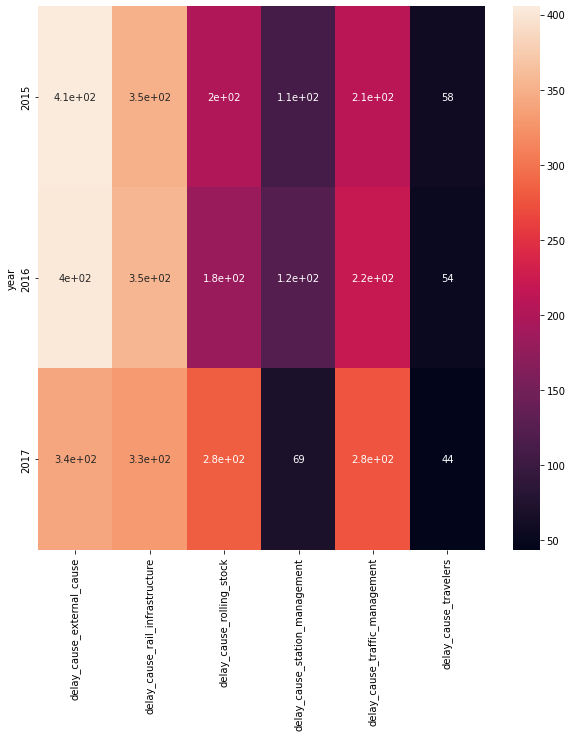

In [ ]:
delays_per_year = df.pivot_table(index='year', values=['delay_cause_external_cause', 'delay_cause_rail_infrastructure', 'delay_cause_traffic_management', 'delay_cause_rolling_stock', 'delay_cause_station_management', 'delay_cause_travelers'], aggfunc='sum')
#print(delays_per_year)

plt.figure(figsize=(10, 10))
# Visualisation de la fluctuation des causes de retard dans le temps
sns.heatmap(delays_per_year, annot=True)
plt.show()

La "heatmap" des causes de retard montre que les causes externes étaient les plus susceptibles de contribuer aux retards en 2015, 2016 et 2017. Donc, les facteurs indépendants des opérateurs ferroviaires, tels que les conditions météorologiques ou les problèmes d'infrastructure, ont été les principaux facteurs de retard au cours de ces années. En revanche, la contribution des retards causés par les voyageurs était relativement faible, ce qui indique que les voyageurs n'ont pas joué un rôle important dans le taux de retard global au cours de ces années.


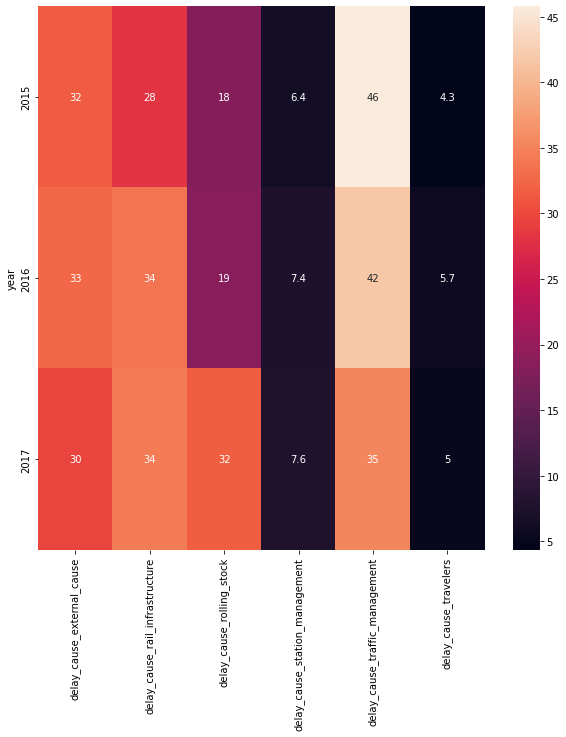

In [ ]:
international = df[df['service'] == 'International']

international_delays = international.pivot_table(index='year', values=['delay_cause_external_cause', 'delay_cause_rail_infrastructure', 'delay_cause_traffic_management', 'delay_cause_rolling_stock', 'delay_cause_station_management', 'delay_cause_travelers'], aggfunc='sum')

plt.figure(figsize=(10, 10))
# Visualitation de causess de retard selon les années pour les trains internationaux
sns.heatmap(international_delays, annot=True)

plt.show()

L'analyse des causes de retard par catégorie de service révèle que pour les services internationaux, les principales causes de retard sont la gestion du trafic et l'infrastructure ferroviaire.
Les facteurs liés à la gestion du trafic ferroviaire et à l'état de l'infrastructure ferroviaire sont les principaux responsables des retards pour les services internationaux.

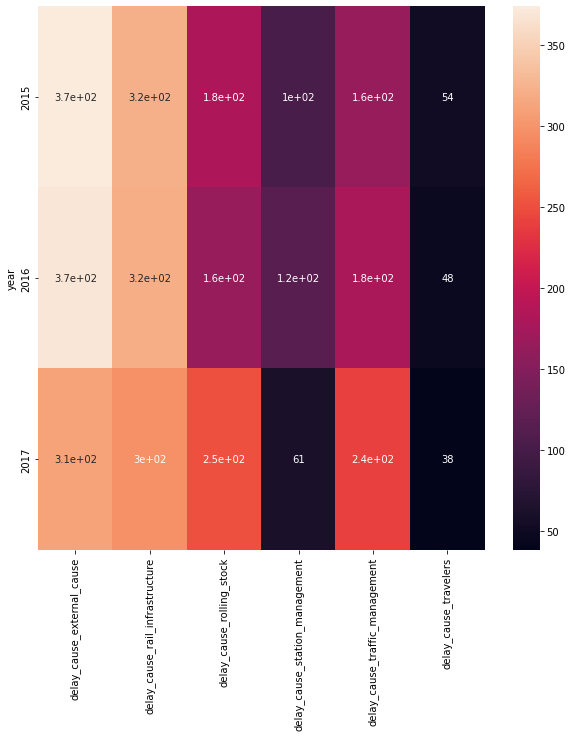

In [ ]:
national = df[df['service'] == 'National']
national_delays = national.pivot_table(index='year', values=['delay_cause_external_cause', 'delay_cause_rail_infrastructure', 'delay_cause_traffic_management', 'delay_cause_rolling_stock', 'delay_cause_station_management', 'delay_cause_travelers'], aggfunc='sum')
plt.figure(figsize=(10, 10))
sns.heatmap(national_delays, annot=True)
plt.show()

L'analyse des causes de retard par catégorie de service révèle que pour les services nationaux, les principales causes de retard sont l'infrastructure ferroviaire et les causes externes. Les facteurs liés à l'état de l'infrastructure ferroviaire et les facteurs externes échappant au contrôle des opérateurs ferroviaires sont les principaux responsables des retards des services nationaux.

# FEATURE ENGINEERING

Dans cette section, trois nouvelles caractéristiques ont été créées à partir des caractéristiques existantes dans l'ensemble de données. Ces caractéristiques sont le taux de retard (delay rate), le taux d'annulation (cancellation rate) et le pourcentage annuel d'annulations (yearly percentage of cancellations). Ces caractéristiques ont été créées pour fournir un aperçu supplémentaire et pour améliorer les réponses aux questions de recherche. L'utilisation de ces caractéristiques a permis une analyse plus détaillée des données et a aidé à identifier des tendances et des modèles importants dans les données.


In [ ]:
df.head()

yearly_trips_delays = df.groupby('year')[['total_num_trips', 'num_of_canceled_trains']].sum()

# Calculate the percentage of cancellations per month
yearly_trips_delays['percentage_of_cancellations'] = yearly_trips_delays['num_of_canceled_trains'] / yearly_trips_delays['total_num_trips'] * 100

# Add the percentage of delays per month as a new column to the data frame
df['yearly_percentage_of_cancellations'] = df['year'].map(yearly_trips_delays['percentage_of_cancellations'])

# Print the updated data frame
df.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,...,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late,delay_rate,cancellation_rate,yearly_percentage_of_cancellations
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,15,11.550000,...,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0,0.050167,0.000000,0.977144
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,10,14.653333,...,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0,0.045872,0.004587,0.977144
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,20,13.694167,...,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0,0.060060,0.003003,0.977144
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,36,20.988426,...,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0,0.074844,0.002079,0.977144
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,16,20.963542,...,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0,0.084211,0.000000,0.977144


# PREDICTIVE ANALYSIS

In [ ]:
#Conversion des les valeurs "string" en valeurs "numerical" dans la colonne de service
le = LabelEncoder()
df['service_encoded']= le.fit_transform(df['service'])
df['departure_station_encoded'] =le.fit_transform(df['departure_station'])
df['arrival_station_encoded'] = le.fit_transform(df['arrival_station'])


In [ ]:
#REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


# Selection des variables
X = df[['service_encoded', 'departure_station_encoded', 'arrival_station_encoded', 'journey_time_avg', 'total_num_trips']]
y = df['yearly_percentage_of_cancellations']

# Separation des données entre variables d'entrainements et variables de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un dictionnaire des modèles de régression
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR()
}

# Passage en revue des modèles et évaluation de chacun d'eux
for model_name, model in models.items():
    # Entraîner le modèle sur les données d'entrainement
    model.fit(X_train, y_train)

    # Evaluer le modèle sur les données de test
    print(f'{model_name}: {model.score(X_test, y_test)}')

Linear Regression: -0.0014477994179327158
Lasso Regression: 0.00020635611815378319
Ridge Regression: -0.0014482400699991071
Elastic Net: 0.00018575703146883615
Random Forest: 0.1068508168927218
Support Vector Regression: -0.03289958557937078


Plusieurs modèles de régression ont été utilisés pour prédire le taux d'annulation annuel. Ces modèles comprenaient la régression linéaire, Lasso, Ridge, Elastic Net, Random Forest et le SVR. Le modèle qui a obtenu la meilleure précision est le modèle Random Forest, avec une précision de 11 %. Cela indique que le modèle Random Forest a été le meilleur pour prédire le taux d'annulation annuel parmi les modèles testés.

In [ ]:
X = df[['departure_station_encoded', 'arrival_station_encoded', 'journey_time_avg', 'total_num_trips', 'num_of_canceled_trains']]
y = df['service']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des variables de X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creation du modèle de regression
R = LogisticRegression(max_iter=1000)

# Entrainement du modèle sur les variables d'entrainement
R.fit(X_train, y_train)

# Evaluation du modèle sur les variables de test
print(R.score(X_test, y_test))

0.9021065675340768


Un modèle de régression logistique a été utilisé pour prédire le type de service (national ou international) sur la base des données fournies. Le modèle a atteint une précision de 90%, ce qui indique qu'il a pu prédire avec exactitude le type de service pour une majorité des données.

In [ ]:
# Selection des variables
X = df[['service_encoded', 'departure_station_encoded', 'arrival_station_encoded', 'journey_time_avg', 'num_of_canceled_trains', 'num_late_at_departure', 'avg_delay_late_at_departure']]
y = df['num_greater_60_min_late']

# Séparation des variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creation d'un dictionnaire de modèles de regression
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR()
}
best_score = 0
best_model = None
#Passage en revue des modèles et évaluation de chacun d'eux
for model_name, model in models.items():
    # Entrainement du modèle
    model.fit(X_train, y_train)

    # Evaluation du modèle
    print(f'{model_name}: {model.score(X_test, y_test)}')
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_model = model
print(f'meilleur modèle {best_model} et son score est {best_score} ')

Linear Regression: 0.48989404799708625
Lasso Regression: 0.4739280990137855
Ridge Regression: 0.4898970470332801
Elastic Net: 0.4775252505235309
Random Forest: 0.6780583109123166
Support Vector Regression: 0.4485671859802538
meilleur modèle RandomForestRegressor() et son score est 0.6780583109123166 


D'après les résultats de l'analyse, le meilleur modèle pour prédire le nombre de trains qui auraient un retard de plus de 60 minutes est le modèle Random Forest, avec une précision de 68 %. Le modèle Random Forest a été capable de prédire avec précision le nombre de trains ayant des retards très importants pour une proportion significative des données.

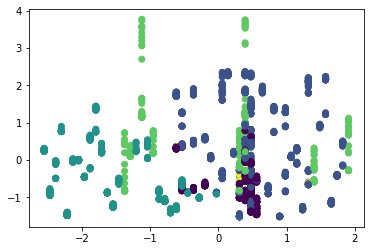

In [ ]:

# Selection des variabes
X = df[['service_encoded', 'departure_station_encoded', 'arrival_station_encoded', 'journey_time_avg', 'num_of_canceled_trains', 'num_late_at_departure', 'avg_delay_late_at_departure']]

# Mise à l'echelle des variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Creation du modèle
kmeans = KMeans(n_clusters= 5)

# Entraîner le modèle sur les données
kmeans.fit(X)

# Predictions
predictions = kmeans.predict(X)
plt.scatter(X[:, 2], X[:, 3], c=predictions, cmap='viridis')
plt.show()

Dans l'analyse finale, un modèle en grappes a été utilisé pour prédire la relation entre les différentes caractéristiques de l'ensemble des données. Ce type de modèle regroupe les points de données qui sont similaires en termes de caractéristiques sélectionnées, et peut être utilisé pour identifier des modèles et des tendances dans les données. Les résultats spécifiques de cette analyse dépendent des caractéristiques et des données utilisées, mais il est probable que le modèle de cluster a permis d'identifier des relations et des modèles importants dans les données. Ces informations peuvent être utilisées pour mieux comprendre les facteurs qui affectent la performance du service de train et pour identifier des solutions potentielles pour améliorer sa fiabilité et sa performance.

#SUMMARY

##Problématique
Les questions de recherche à propos des données sur les trains de la SNCF étaint au départ posés comme telles:
1. Quel le temps moyen de parcours moyen des trains français et comment varie-t-il dans le temps ?
2. Quelles sont les causes les plus fréquentes d'annulation et de retard des trains en France ?
3. Comment le nombre de trains en retard et le retard moyen au départ varient-ils dans le temps ?
### Réponses
Les réponses à ces questions par l'analyse de l'ensemble des données sont;
* Le temps moyen de parcours est de 164 minutes et il a tendance a etre plus important en 2017.

* Les causes les plus courantes des annulations et des retards de trains en France sont les facteurs externes et l'infrastructure ferroviaire. Le nombre de retards causés par les voyageurs était relativement faible.
* Le nombre de trains en retard et le retard moyen au départ varient dans le temps, avec des pics importants observés certains mois. Par exemple, le taux de retard a augmenté de manière significative en octobre 2015, juin 2016 et juillet 2017.

##Description
L'analyse visuelle et prédictive de l'ensemble de données sur les trains français a permis de faire plusieurs découvertes importantes, dont un graphique de réseau montrant les relations entre les différentes destinations et les gares centrales. Le graphique montre qu'il existe six destinations internationales (Italie, Francfort, Stuttgart, Lausanne, Zurich et Genève) et deux gares centrales (Paris Lyon et Paris Montparnasse).
Le nombre de trains ayant un retard de plus de 60 minutes était plus susceptible d'appartenir à la catégorie du service national, ce qui indique que les trains de ce service étaient plus sujets à des retards plus longs. Le taux de retard a également connu plusieurs pics, avec des augmentations significatives observées en octobre 2015, juin 2016 et juillet 2017. Le taux d'annulation et le taux de retard ont tous deux augmenté en juin 2016, ce qui suggère que des facteurs communs en jeu au cours de ce mois ont conduit à une augmentation des deux paramètres. Les principales causes de retard étaient des facteurs externes et l'infrastructure ferroviaire, et la contribution des retards causés par les voyageurs était relativement faible.
##Analyse prédictive ("Predictive Analysis")
Le modèle le plus efficace pour prédire le taux de retard annuel et le nombre de trains présentant des retards plus importants était le modèle Random Forest. Dans l'ensemble, ces résultats fournissent des informations précieuses sur les performances du service ferroviaire français et peuvent être utilisés pour identifier les domaines potentiels d'amélioration.
##Implications managériales
1. Les résultats de l'analyse peuvent être utilisés pour identifier les domaines potentiels d'amélioration des performances du service ferroviaire. Par exemple, l'analyse a révélé que les services nationaux étaient plus susceptibles de subir des retards plus longs, ce qui indique qu'une attention supplémentaire pourrait être nécessaire pour améliorer la fiabilité de ces services.

2. L'analyse des causes des annulations et des retards peut aider les opérateurs ferroviaires à élaborer des stratégies pour réduire l'incidence de ces perturbations. Par exemple, les résultats suggèrent que les efforts visant à améliorer l'infrastructure ferroviaire et à traiter les facteurs externes peuvent être efficaces pour réduire le nombre d'annulations et de retards.

3. L'analyse de la relation entre le nombre de trains en retard et le retard moyen au départ peut aider les opérateurs ferroviaires à élaborer des horaires plus efficaces et à mieux gérer le flux des trains. Cela peut contribuer à réduire le nombre global de trains qui subissent des retards et à améliorer la fiabilité du service ferroviaire.
4. Le temps moyen de parcours des trains en 2017 particulièrement élevé devrait alarmer les manageurs de la SNCF car cela aurait pu etre une cause sous-jacente de l'augmentation de leur cout.
##Limitation du projet
-  L'ensemble de données ne comprend que des données d'une période spécifique, et peut ne pas être représentatif de la performance du service de train sur une plus longue période de temps. Cela pourrait limiter la généralisation des résultats et rendre difficile l'identification des tendances et des modèles à long terme dans les données.

-  L'ensemble de données ne comprenait qu'un nombre limité de caractéristiques et n'incluait pas d'informations sur tous les facteurs potentiels susceptibles d'affecter la performance du service ferroviaire. Cela pourrait limiter la capacité de l'analyse à prédire avec précision la performance du service ferroviaire et à identifier les causes sous-jacentes des annulations et des retards.

-  L'analyse s'est appuyée sur l'exactitude et l'exhaustivité des données fournies dans l'ensemble de données. Toute erreur ou donnée manquante dans l'ensemble de données pourrait affecter la fiabilité des résultats et des conclusions de l'analyse.